<a href="https://colab.research.google.com/github/S0xb/MachineLearning/blob/master/DNN_MNIST_with_tensorflow_2_0_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
from tensorflow.python.client import device_lib
import numpy as np
import timeit
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import datetime as dt

from tensorflow.keras import layers

import cv2
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.python.framework import ops
ops.reset_default_graph()

In [0]:
!pip install tf-nightly-gpu-2.0-preview

    100% |████████████████████████████████| 332.2MB 70kB/s 
    100% |████████████████████████████████| 358kB 12.5MB/s 
    100% |████████████████████████████████| 61kB 24.7MB/s 
    100% |████████████████████████████████| 3.0MB 8.9MB/s 


In [0]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf:
    print(module.__name__, module.__version__)

python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
matplotlib 3.0.3
numpy 1.14.6
pandas 0.22.0
sklearn 0.20.3
tensorflow 2.0.0-dev20190306


In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Device detected {}'.format(device_name))

Device detected /device:GPU:0


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [0]:
# Returns a short sequential model
def create_model_sequential_v1():
  
  if tf.test.is_gpu_available() > 0:
    with tf.device('/gpu:0'):
      
      model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
      ])

      model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

  return model

In [0]:
# Returns a short sequential model
def create_model_sequential_v2():

  if tf.test.is_gpu_available() > 0:
    with tf.device('/gpu:0'):
      model = tf.keras.Sequential()
      model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
      model.add(tf.keras.layers.Dense(64, activation='relu'))
      model.add(tf.keras.layers.Dense(64, activation='relu'))
      model.add(tf.keras.layers.Dense(10, activation='softmax'))

      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
  return model

In [0]:
# Returns a short sequential model
def create_model_functional_api():
  
  if tf.test.is_gpu_available() > 0:
    with tf.device('/gpu:0'):
      
      inputs = tf.keras.Input(shape=(28,28))
      x = tf.keras.layers.Flatten()(inputs)
      # A layer instance is callable on a tensor, and returns a tensor.
      x = tf.keras.layers.Dense(64, activation='relu',
                                kernel_initializer=tf.keras.initializers.VarianceScaling)(x)
      x = tf.keras.layers.Dense(64, activation='relu')(x)
      predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

      # Instantiate the model given inputs and outputs.
      model = tf.keras.Model(inputs=inputs, outputs=predictions)

      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
  return model

In [0]:
model = create_model_sequential_v1()
print(model)
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.1187 - accuracy: 0.9647


[0.11868066541552544, 0.9647]

In [0]:
model = create_model_sequential_v2()
print(model)
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.1527 - accuracy: 0.9530


[0.15273208085894585, 0.953]

In [0]:
model = create_model_functional_api()
print(model)
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.1402 - accuracy: 0.9567


[0.14024257123693823, 0.9567]

In [0]:
model.save('weights.h5')

In [0]:
#Del the model
del model

In [0]:
model = tf.keras.models.load_model('weights.h5')


10000/10000 [==============================] - 1s 89us/sample - loss: 0.1187 - accuracy: 0.9647


[0.11868066541552544, 0.9647]

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.1389 - accuracy: 0.9588


[0.13893870964460076, 0.9588]

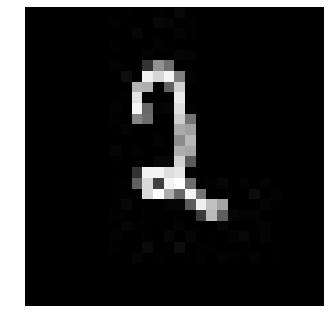

In [0]:
#Read image from local storage

newX = 28
newY = 28

img = cv2.imread('test_2.jpeg')
#img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image = cv2.resize(img_cvt,(int(newX),int(newY)))


image_pred = np.array(image)

image_pred = image_pred / 255.0 
#print(image)

#print(image_pred)

plt.imshow(image_pred,cmap='gray')
plt.axis("off")
plt.show()

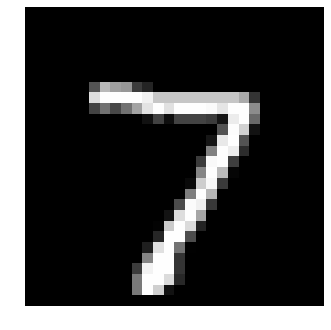

7
(28, 28)


In [0]:
image = x_test[0]
#print(image)
plt.imshow(image,cmap='gray')
plt.axis("off")
plt.show()
print(y_test[0])
print(x_test[0].shape)

In [0]:
model = tf.keras.models.load_model('weights.h5')

pred = model.predict(image_pred.reshape(1,28,28))
print(pred*100)
y_pred = np.argmax(pred)

print("Digit from model is: ",y_pred)

[[ 1.0936368 19.494368  15.383927  16.438597   1.6920401  3.2336824
   1.3838794 27.355364   9.523728   4.400775 ]]
Digit from model is:  7
